In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("statement/compas.csv")

In [5]:
data

,case_number,first_name,last_name,sex,age,age_category,race,juvenile_felony_count,juvenile_misdemeanors_count,juvenile_other_count,...,charge_degree,offense_date,screening_date,jail_in,jail_out,type_of_assessment,score,score_text,is_recidivist,prediction
0,13011352CF10A,miguel,hernandez,Male,69,Greater than 45,Other,0,0,0,...,F,8/13/2013,8/14/2013,8/13/2013 6:03,8/14/2013 5:41,Risk of Recidivism,1,Low,0,0
1,13001275CF10A,kevon,dixon,Male,34,25 - 45,African-American,0,0,0,...,F,1/26/2013,1/27/2013,1/26/2013 3:45,2/5/2013 5:36,Risk of Recidivism,3,Low,1,0
2,13005330CF10A,ed,philo,Male,24,Less than 25,African-American,0,0,1,...,F,4/13/2013,4/14/2013,4/13/2013 4:58,4/14/2013 7:02,Risk of Recidivism,4,Low,1,0
3,13022355MM10A,marsha,miles,Male,44,25 - 45,Other,0,0,0,...,M,11/30/2013,11/30/2013,11/30/2013 4:50,12/1/2013 12:28,Risk of Recidivism,1,Low,0,0
4,14002304CF10A,edward,riddle,Male,41,25 - 45,Caucasian,0,0,0,...,F,2/18/2014,2/19/2014,2/18/2014 5:08,2/24/2014 12:18,Risk of Recidivism,6,Medium,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8845,14003651MM10A,carlos,vasquez,Male,44,25 - 45,Hispanic,0,0,0,...,M,3/3/2014,3/4/2014,3/3/2014 9:42,3/4/2014 9:23,Risk of Recidivism,1,Low,0,0
8846,13003941MM10A,rodrick,phillips,Male,63,Greater than 45,African-American,0,0,0,...,M,2/25/2013,2/27/2013,2/25/2013 9:20,2/26/2013 1:21,Risk of Recidivism,1,Low,1,0
8847,13013317CF10A,patrick,hamilton,Male,47,Greater than 45,Other,0,0,0,...,F,9/21/2013,9/22/2013,9/21/2013 4:06,9/22/2013 8:16,Risk of Recidivism,3,Low,0,0
8848,13009569MM10A,raymond,hernandez,Male,22,Less than 25,Caucasian,0,3,5,...,M,5/16/2013,5/17/2013,5/16/2013 8:58,5/18/2013 7:59,Risk of Recidivism,7,Medium,1,1


In [74]:
subdata = data[['is_recidivist','prediction']]
subdata

,is_recidivist,prediction
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0
...,...,...
8845,0,0
8846,1,0
8847,0,0
8848,1,1


In [29]:
np.min(subdata["score"].values) # good to know : prediction since score > 7

7

In [66]:
crit = "race"

In [67]:
crit_values = data[crit].unique()

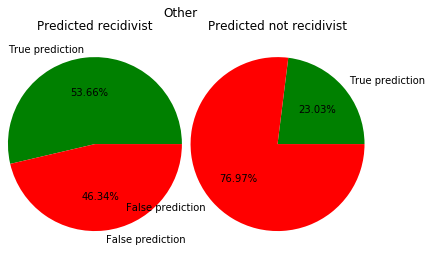

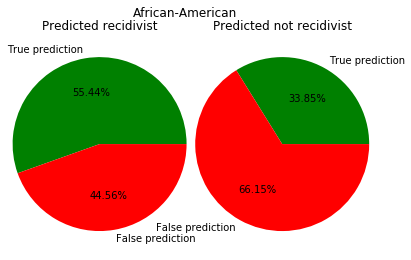

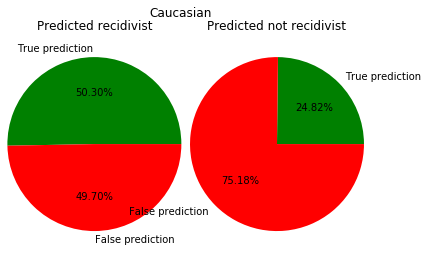

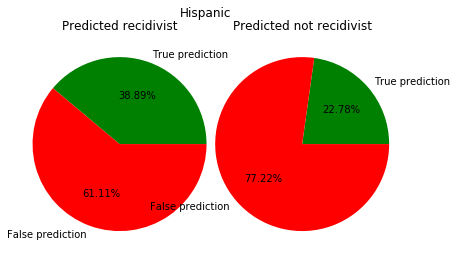

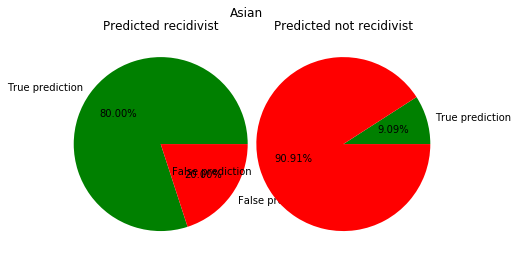

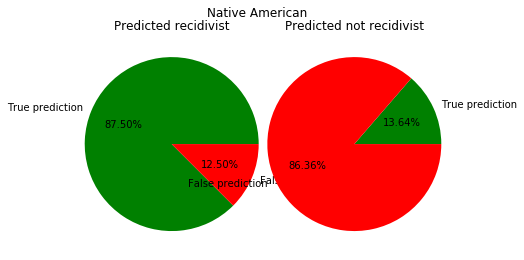

In [68]:
for val in crit_values:
    new_data = data.loc[data[crit]==val]
    
    fig,(ax1,ax2) = plt.subplots(1,2, sharey=True)
    ax1.axis('equal')
    ax2.axis('equal')
    
    langs = ['True prediction', 'False prediction']
    prop_pred_rec   = len(new_data.loc[(data['prediction']==1) & (data['is_recidivist']==1)])
    prop_pred_nrec  = len(new_data.loc[(data['prediction']==1) & (data['is_recidivist']==0)])
    prop_npred_rec  = len(new_data.loc[(data['prediction']==0) & (data['is_recidivist']==1)])
    prop_npred_nrec = len(new_data.loc[(data['prediction']==0) & (data['is_recidivist']==0)])
    
    props = [prop_pred_rec, prop_pred_nrec, prop_npred_rec, prop_npred_nrec]
    
    ax1.pie([prop_pred_rec, prop_pred_nrec], labels = langs, autopct='%1.2f%%', colors=['green','red'])
    ax2.pie([prop_npred_rec, prop_npred_nrec], labels = langs, autopct='%1.2f%%', colors=['green','red'])

    ax1.title.set_text("Predicted recidivist")
    ax2.title.set_text("Predicted not recidivist")
    
    fig.suptitle(val)

    plt.show()